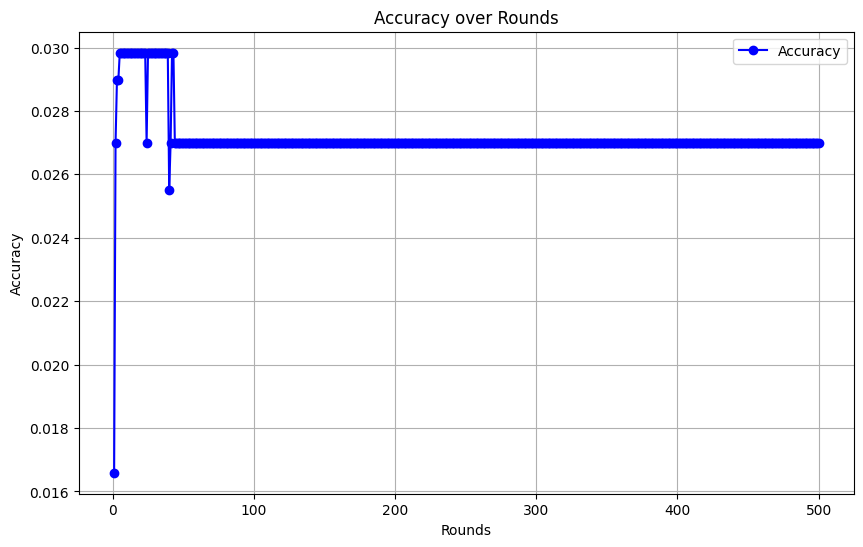

In [16]:
#plot accuracy for each round
import matplotlib.pyplot as plt

# File path to the accuracy data
file_path = "./accuracy.txt"

# Step 1: Read the file and load the accuracy data
with open(file_path, 'r') as file:
    accuracy_data = [float(line.strip()) for line in file]

# Step 2: Generate the rounds
rounds = list(range(1, len(accuracy_data) + 1))

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rounds, accuracy_data, marker='o', color='b', label='Accuracy')

# Step 4: Add titles and labels
plt.title('Accuracy over Rounds')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

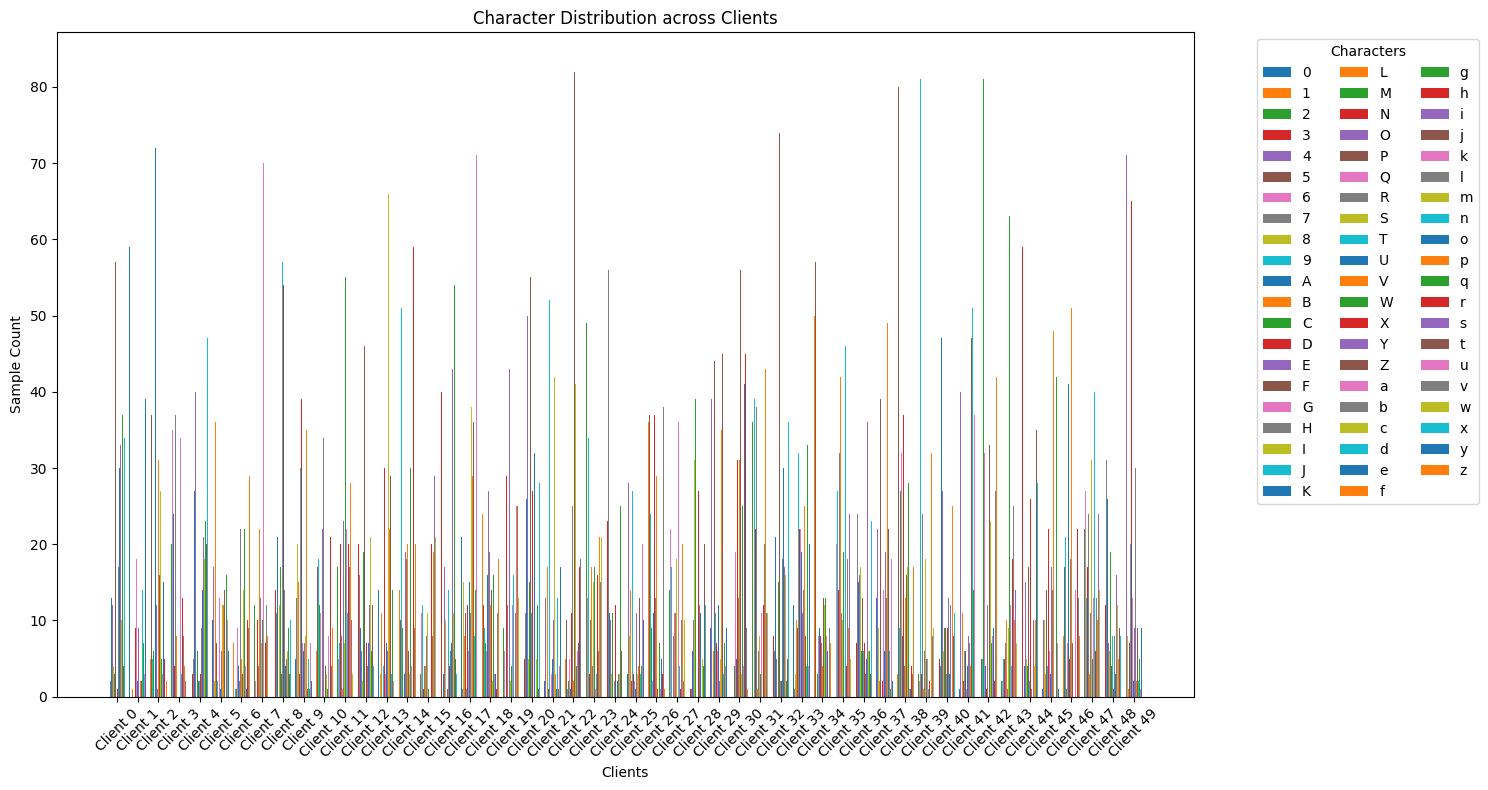

In [19]:
# plot each client data distirbution by class
import json
import matplotlib.pyplot as plt
import numpy as np

# Replace with the path to your data file
file_path = "./dirichlet_distribution_by_character.txt"

# Read data from the file
data = {}
with open(file_path, 'r') as f:
    for line in f:
        client, values = line.split(': ', 1)
        client = client.strip()
        values = json.loads(values.replace("'", "\""))
        data[client] = values

# Get all unique characters across all clients for consistency in the plot
all_characters = sorted(set(char for counts in data.values() for char in counts.keys()))

# Prepare the plot
clients = list(data.keys())
x = np.arange(len(clients))  # the label locations
width = 0.8 / len(all_characters)  # the width of the bars

# Create a figure
plt.figure(figsize=(15, 8))

# Plot each character as a separate set of bars
for idx, character in enumerate(all_characters):
    # Gather counts for each client for the given character
    counts = [data[client].get(character, 0) for client in clients]
    plt.bar(x + idx * width, counts, width=width, label=character)

# Set labels and title
plt.xlabel('Clients')
plt.ylabel('Sample Count')
plt.title('Character Distribution across Clients')
plt.xticks(x + width * (len(all_characters) - 1) / 2, clients, rotation=45)

# Adjust the legend to have 3 columns
plt.legend(title='Characters', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
#calculate the total number of samples for each client
import ast

# File path to the distribution data
file_path = "./dirichlet_distribution_by_character.txt"

# Initialize a dictionary to store the total number of samples for each client
client_sample_counts = {}

# Step 1: Read the file and parse the data
with open(file_path, 'r') as file:
    for line in file:
        # Parse the line to extract client ID and character distribution
        client_id_str, char_distribution_str = line.split(": ", 1)
        client_id = int(client_id_str.split(" ")[1])
        char_distribution = ast.literal_eval(char_distribution_str.strip())
        
        # Calculate the total number of samples for this client
        total_samples = sum(char_distribution.values())
        
        # Store the total number of samples in the dictionary
        client_sample_counts[client_id] = total_samples

# Print the total number of samples for each client
for client_id, total_samples in client_sample_counts.items():
    print(f"Client {client_id}: Total samples = {total_samples}")

Client 0: Total samples = 9972
Client 1: Total samples = 9969
Client 2: Total samples = 9969
Client 3: Total samples = 9972
Client 4: Total samples = 9970
Client 5: Total samples = 9966
Client 6: Total samples = 9961
Client 7: Total samples = 9969
Client 8: Total samples = 9967
Client 9: Total samples = 9970
Client 10: Total samples = 9969
Client 11: Total samples = 9970
Client 12: Total samples = 9968
Client 13: Total samples = 9969
Client 14: Total samples = 9967
Client 15: Total samples = 9966
Client 16: Total samples = 9970
Client 17: Total samples = 9971
Client 18: Total samples = 9973
Client 19: Total samples = 9968
Client 20: Total samples = 9970
Client 21: Total samples = 9972
Client 22: Total samples = 9970
Client 23: Total samples = 9970
Client 24: Total samples = 9970
Client 25: Total samples = 9969
Client 26: Total samples = 9969
Client 27: Total samples = 9970
Client 28: Total samples = 9968
Client 29: Total samples = 9974
Client 30: Total samples = 9966
Client 31: Total s

In [12]:
#calculate the sum of proportions for each client
from collections import defaultdict

# File path to the proportions data
file_path = "./proportions.txt"

# Initialize a dictionary to store the sum of proportions for each client
client_sum_proportions = defaultdict(float)

# Step 1: Read the file and parse the data
with open(file_path, 'r') as file:
    for line in file:
        # Parse the line
        parts = line.strip().split(", ")
        if len(parts) == 2:
            client_id = int(parts[0].split(" ")[1])
            proportion = float(parts[1].split(": ")[1])
            
            # Add the proportion to the corresponding client
            client_sum_proportions[client_id] += proportion

# Print the sum of proportions for each client
for client_id, sum_proportion in client_sum_proportions.items():
    print(f"Client {client_id}: Sum of proportions = {sum_proportion}")

Client 0: Sum of proportions = 0.9999999999999997
Client 1: Sum of proportions = 1.0000000000000002
Client 2: Sum of proportions = 0.9999999999999998
Client 3: Sum of proportions = 0.9999999999999997
Client 4: Sum of proportions = 0.9999999999999996
Client 5: Sum of proportions = 1.0000000000000007
Client 6: Sum of proportions = 0.9999999999999999
Client 7: Sum of proportions = 1.0000000000000007
Client 8: Sum of proportions = 1.0000000000000002
Client 9: Sum of proportions = 1.0000000000000002
Client 10: Sum of proportions = 1.0000000000000004
Client 11: Sum of proportions = 1.0000000000000002
Client 12: Sum of proportions = 1.0
Client 13: Sum of proportions = 0.9999999999999999
Client 14: Sum of proportions = 1.0
Client 15: Sum of proportions = 0.9999999999999999
Client 16: Sum of proportions = 1.0000000000000004
Client 17: Sum of proportions = 1.0
Client 18: Sum of proportions = 0.9999999999999998
Client 19: Sum of proportions = 1.0000000000000002
Client 20: Sum of proportions = 1.0

In [13]:
# List of file paths to clear
file_paths = [
    "./accuracy.txt",
    "./dirichlet_distribution_by_character.txt",
    "./min_max_item_per_class.txt",
    "./proportions.txt"
]

# Clear the contents of each file
for file_path in file_paths:
    with open(file_path, "w") as file:
        pass  # Opening the file in write mode and immediately closing it clears the file

In [14]:
import os
import shutil

# Path to the directory
dir_path = "/tmp/ray"

# List all items in the directory
items = os.listdir(dir_path)

# Iterate over all items
for item in items:
    item_path = os.path.join(dir_path, item)
    # Check if the item is not the 'session_latest' folder
    if item != "session_latest":
        # If it's a file, remove it
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)
        # If it's a directory, remove it and all its contents
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)

print("Cleanup completed.")

Cleanup completed.
